In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [165]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [166]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [167]:
df['Age'].skew()

np.float64(0.38910778230082704)

In [168]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [169]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [170]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [171]:
df.duplicated().sum()

np.int64(0)

In [172]:
df['Age'] = df['Age'].astype(float)

In [173]:
df['Pclass'] = df['Pclass'].astype(str)

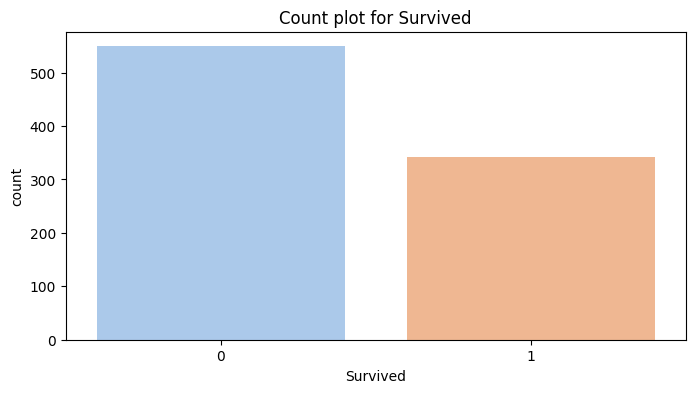

In [174]:
plt.figure(figsize =(8,4))
sns.countplot(data = df , x = 'Survived',hue='Survived', dodge=False, legend=False,palette = 'pastel')
plt.title('Count plot for Survived')
plt.show()

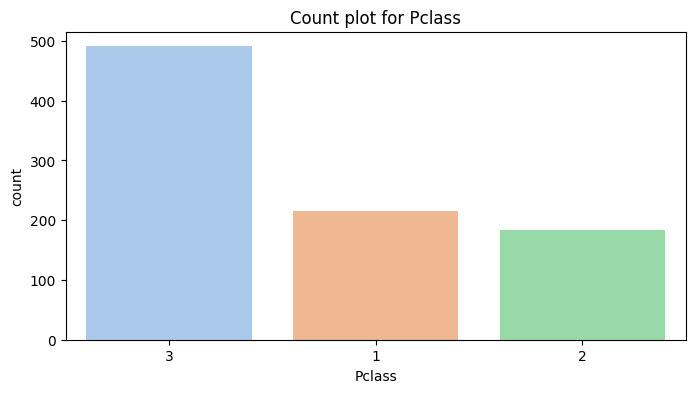

In [175]:
plt.figure(figsize =(8,4))
sns.countplot(data = df , x = 'Pclass',hue='Pclass', dodge=False, legend=False,palette = 'pastel')
plt.title('Count plot for Pclass')
plt.show()

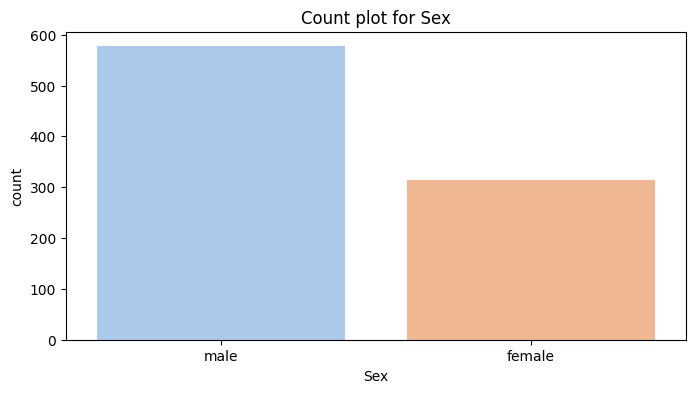

In [176]:
plt.figure(figsize =(8,4))
sns.countplot(data = df , x='Sex',hue='Sex', dodge=False, legend=False,palette = 'pastel')
plt.title('Count plot for Sex')
plt.show()

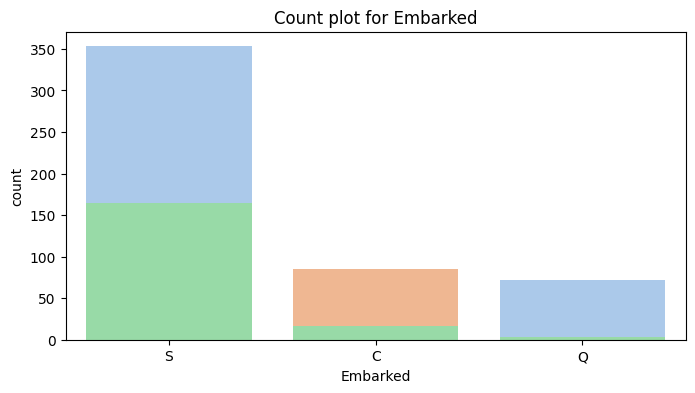

In [177]:
plt.figure(figsize =(8,4))
sns.countplot(data = df , x = 'Embarked',hue='Pclass', dodge=False, legend=False,palette = 'pastel')
plt.title('Count plot for Embarked')
plt.show()

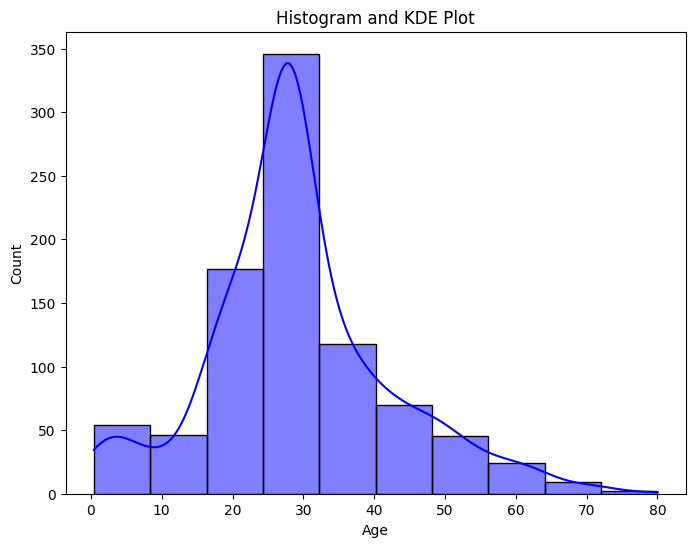

In [178]:

# Create combined histogram and KDE plot
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'],kde=True, color='blue', bins=10)

plt.title('Histogram and KDE Plot')
plt.show()


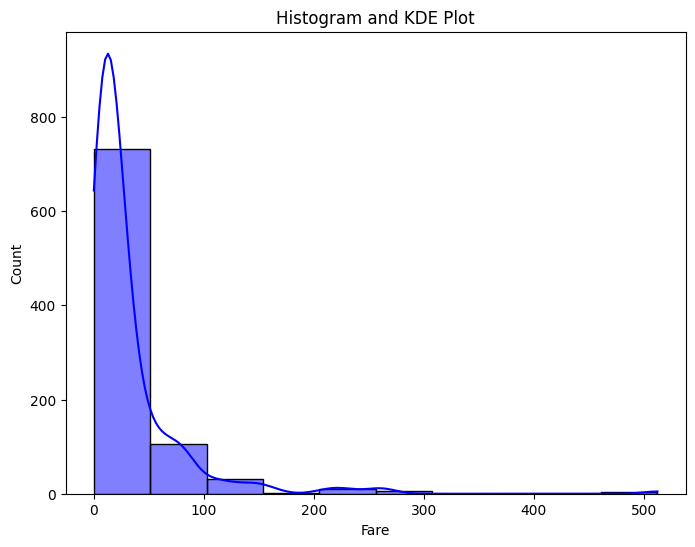

In [179]:
# Create combined histogram and KDE plot
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'],kde=True, color='blue', bins=10)

plt.title('Histogram and KDE Plot')
plt.show()

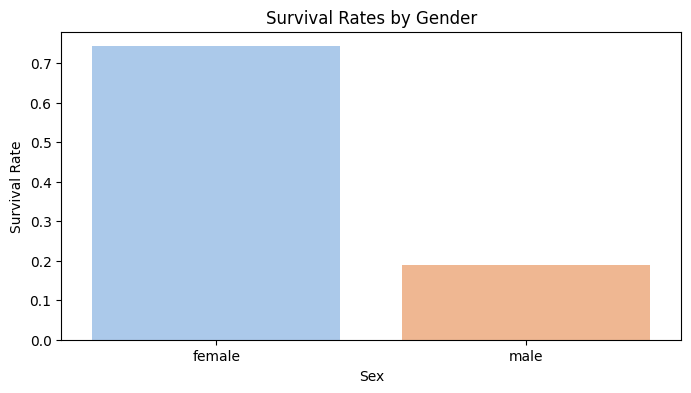

In [180]:

survival_gender = df.groupby('Sex')['Survived'].mean().reset_index()

# Plot the survival rates using barplot
plt.figure(figsize=(8, 4))
sns.barplot(data=survival_gender, x='Sex',hue ='Sex', dodge = False,legend=False, y='Survived', palette='pastel')

plt.title('Survival Rates by Gender')
plt.ylabel('Survival Rate')
plt.show()


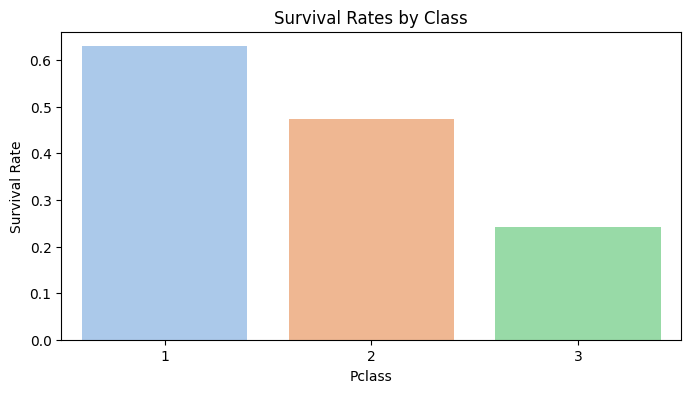

In [181]:
survival_class = df.groupby('Pclass')['Survived'].mean().reset_index()

# Plot the survival rates using barplot
plt.figure(figsize=(8, 4))
sns.barplot(data=survival_class, x='Pclass',hue ='Pclass', dodge = False,legend=False, y='Survived', palette='pastel')

plt.title('Survival Rates by Class')
plt.ylabel('Survival Rate')
plt.show()

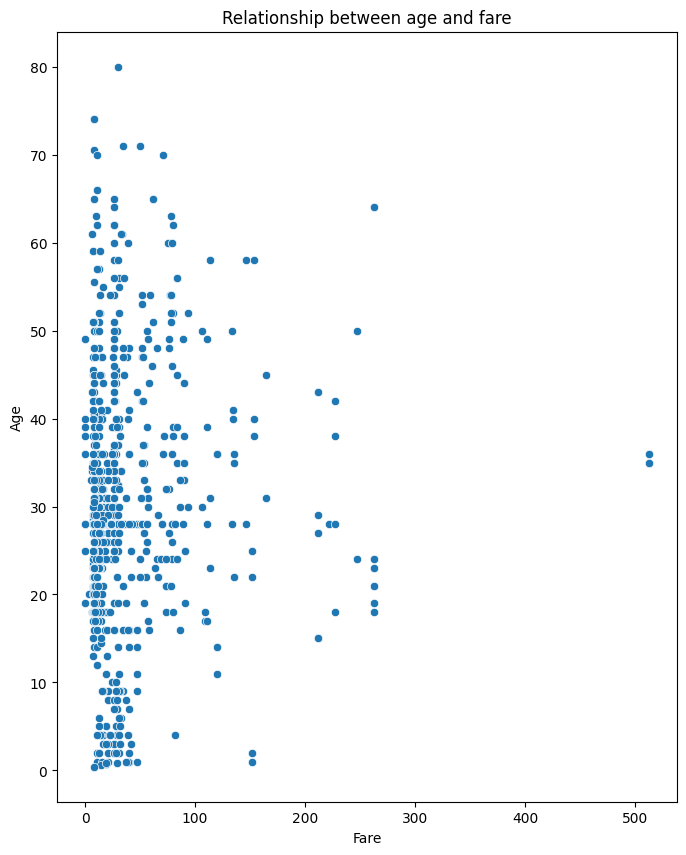

In [182]:
plt.figure(figsize=(8,10))
sns.scatterplot(data=df, x='Fare',legend=False, y='Age')

plt.title('Relationship between age and fare')
plt.ylabel('Age')
plt.show()

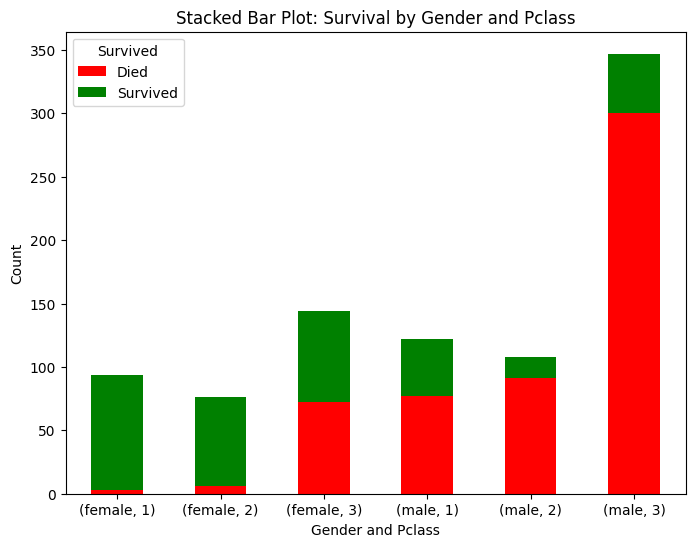

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate survival counts by Gender, Pclass, and Survived
survival_counts = df.groupby(['Sex', 'Pclass', 'Survived']).size().unstack(level='Survived', fill_value=0)

# Plot stacked bar chart
survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))

plt.title('Stacked Bar Plot: Survival by Gender and Pclass')
plt.xlabel('Gender and Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()



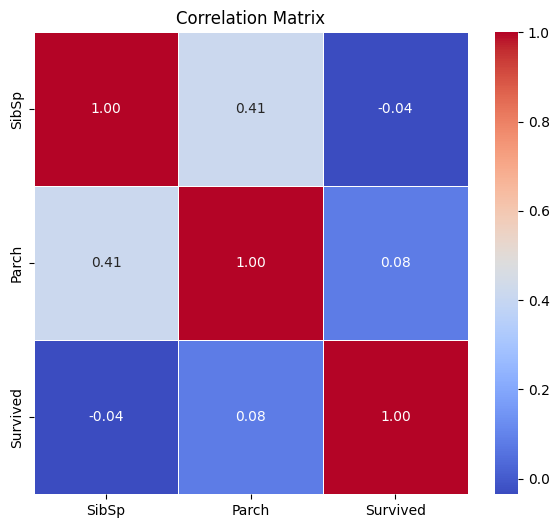

In [184]:
num = df[['SibSp','Parch','Survived']]

correlation_matrix = num.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [185]:
import re

In [186]:
print(df['Name'].tolist())


['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Allen, Mr. William Henry', 'Moran, Mr. James', 'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard', 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'Nasser, Mrs. Nicholas (Adele Achem)', 'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth', 'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan', 'Vestrom, Miss. Hulda Amanda Adolfina', 'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene', 'Williams, Mr. Charles Eugene', 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)', 'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J', 'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"', 'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira', 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)', 'Emir, Mr. Farred Chehab', 'Fortune, Mr. Charles Alexander', 'O\'Dwyer, Miss. Ellen "Nelli

In [190]:
import re

sample = "Braund, Mr. Owen Harris"  # Replace with an actual value from the data
pattern = r'(Dr\.|Mr\.|Mrs\.|Ms\.|Prof\.)'

match = re.search(pattern, sample.strip())
if match:
    print("Matched Title:", match.group(1))
else:
    print("No match found.")
    


Matched Title: Mr.


In [193]:
pattern = r'(Dr\.|Mr\.|Mrs\.|Ms\.|Prof\.)'

# Step 3: Extract titles
df['Title'] = df['Name'].str.extract(pattern, expand=False)

# Step 4: Replace NaN with "No Title"
df['Title'] = df['Title'].fillna('No Title')

print(df)

     PassengerId  Survived Pclass  \
0              1         0      3   
1              2         1      1   
2              3         1      3   
3              4         1      1   
4              5         0      3   
..           ...       ...    ...   
886          887         0      2   
887          888         1      1   
888          889         0      3   
889          890         1      1   
890          891         0      3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
88

In [195]:
bins = [0,100,250,500]  # Specify bin edges
labels = ['Low (0-100)',  'Medium (100-250)', 'High (250-500)']  # Labels for the ranges

# Create a new column with the categorized fares
df['Fare Range'] = pd.cut(df['Fare'], bins=bins, labels=labels, include_lowest=True)

print(df)

     PassengerId  Survived Pclass  \
0              1         0      3   
1              2         1      1   
2              3         1      3   
3              4         1      1   
4              5         0      3   
..           ...       ...    ...   
886          887         0      2   
887          888         1      1   
888          889         0      3   
889          890         1      1   
890          891         0      3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
88

In [196]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [197]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare Range,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr.,Low (0-100),2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,Low (0-100),2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,No Title,Low (0-100),1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Low (0-100),2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr.,Low (0-100),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S,No Title,Low (0-100),1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,No Title,Low (0-100),1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Unknown,S,No Title,Low (0-100),4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,Low (0-100),1


In [199]:
df['FamilySize'] = df['FamilySize'].astype(str)


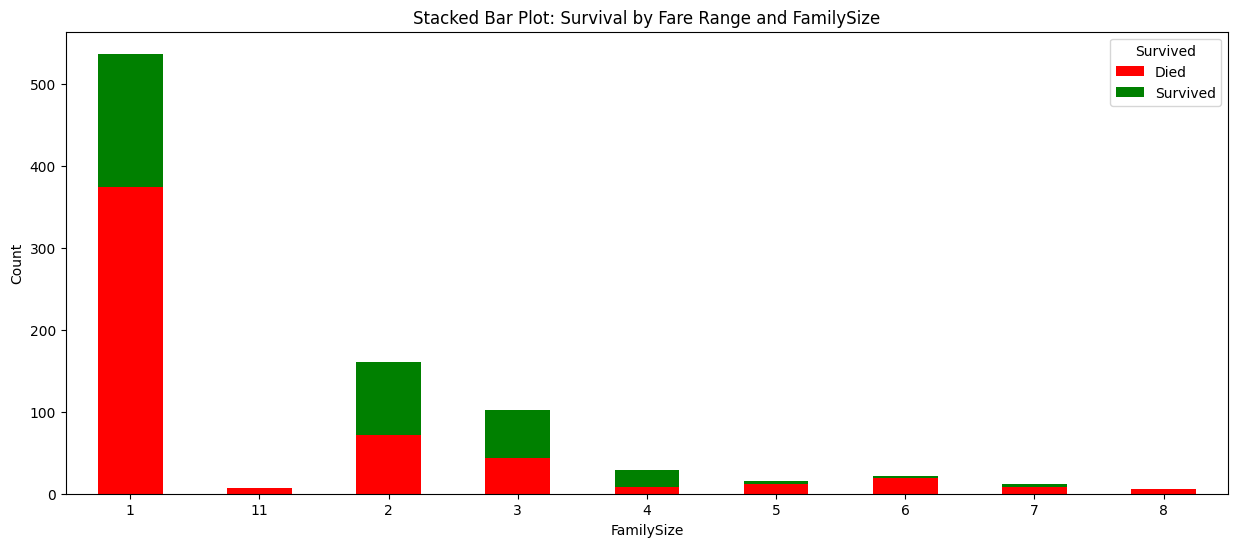

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

survival_counts = df.groupby(['FamilySize',  'Survived']).size().unstack(level='Survived', fill_value=0)

# Plot stacked bar chart
survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(15,6))

plt.title('Stacked Bar Plot: Survival by Fare Range and FamilySize')
plt.xlabel('FamilySize')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()
